<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_Datos_UGR_24/blob/main/Encuentro2_Analisis_ExploratorioParte2_ConRespuestas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MeTCaMPDatos**


**Edición 2021**

<img src="https://i.imgur.com/HnKHks1.png" height="150" />

## Aventurándonos en el mundo de los **datos**
En éste Notebook profundizaremos en los diferentes tipos de análisis que podemos realizar en un set de datos:
- Medidas de estadística descriptiva.
- Visualizaciones.
- Probabilidades.

## Objetivos
- Introducir funciones necesarias para una exploración inicial del dataset.
- Brindar nociones básicas de diferentes medidas de estadística descriptiva aplicadas.
- Pensar preguntas o problemas y definir las variables de interés.
- Descubrir un primer insight que aporte valor al análisis.


## Herramientas de trabajo
En esta oportunidad vamos a utilizar el lenguaje de programación "Python" junto con la herramienta web "Google Colab" para realizar nuestro primer análisis de la encuesta de sueldos. Recorda que Colab es un servicio cloud basado en los Notebooks de Jupyter, por lo tanto no es necesario descargar nada. A su vez, nos iniciaremos en un primer uso de herramientas de software libre, es decir no necesitas una licencia para porder utilizarlas.

<center>
<img src="https://i.imgur.com/Cq52LcH.png" height="150" />
</center>

## Explorando algunos datos
Vamos a trabajar con un set de datos obtenido de **SysArmy** que se denomina **"Encuesta de Sueldos"** y se puede consultar en: [este sitio](https://sysarmy.com/blog/posts/resultados-de-la-encuesta-de-sueldos-2020-2/).

<center>
<img src="https://i.imgur.com/ivxTHhG.png" height="150" />
</center>

Sysarmy es una organización internacional perteneciente a la comunidad de sistemas que nuclea a profesionales del área para favorecer el contacto y el intercambio de conocimiento de manera informal. Anualmente desarrollan una encuesta de sueldos con el objetivo de obtener información sobre la situación laboral actual en tecnología, evalúan el máximo nivel educativo alcanzado de los encuestados y brindan información sobre diferentes empresas.

## ¿Que es "EDA"?

En sus siglas en inglés hace referencia al **Análisis Exploratorio de Datos**. Este es el primer paso que debemos realizar como Data Scientists y consta de una primera revisión del estado de los datos y los consecuentes pasos necesarios para una correcta transformación.

La ciencia de datos es una disciplina que te permite convertir datos crudos en entendimiento, comprensión y conocimiento.

<center>
<img src="https://i.imgur.com/jclXnDS.png" height="200" />
</center>


En este sentido, el primer objetivo radica en preguntarnos **¿De qué se trata este dataset?**

## Importación de librerías

El concepto correcto en español es "biblioteca". Una biblioteca es básicamente un componente de software que nos brinda acceso a distintas funcionalidades.
Existen librerías con funciones para leer un archivo excel o csv y trabajar los datos como tablas (librería Pandas, por ejemplo), otras con funciones para graficar nuestros datos (como Seaborn), para trabajar con cálculo numérico (como Numpy).
Cualquiera sea el lenguaje con el que se decida programar, será útil conocer mediante la página oficial del lenguaje cuáles son las librerías disponibles, que nos facilitarán, en éste caso, el análisis de datos.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(10,6)})

## Lectura del dataset

Vamos a trabajar con el dataset de encuesta de sueldos de Sysarmy, con las columnas renombradas (sin espacios, ni acentos, ni preguntas largas), que se realizó en el primer encuentro.
Éste archivo "renombrado" en formato csv, ya se encuentra en el repositorio GitHub de MET.
No es necesario descargarlo, se puede "leer" en éste notebook directamente desde el link de GitHub.

Los datos que leamos desde el archivo en formato [csv](https://es.wikipedia.org/wiki/Valores_separados_por_comas), se guardarán en una variable llamada `df` que es un objeto del tipo `DataFrame`.

Un `DataFrame` es una estructura de datos con dos dimensiones en la cual se puede guardar datos de distintos tipos (como caractéres, enteros, valores de punto flotante y más) en columnas. Es similar a una hoja de cálculo o una tabla de SQL. Un DataFrame siempre tiene un índice (con inicio en 0). El índice refiere a la posición de un elemento en la estructura de datos.

<center>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/finallpandas.png
" height="350" />
</center>


In [ ]:
url = 'https://raw.githubusercontent.com/MeT2021/MeTCamp-Data-Science/main/Encuentro2/Dataset/sysarmy_2020_renamed.csv'
df = pd.read_csv(url, index_col=0)
df[:3] # Es otra manera de ver las primeras filas, similar a .head()

,perfil_genero,perfil_edad,trabajo_pais,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,perfil_carrera,perfil_universidad,perfil_cursos_especializacion,perfil_contribuciones_open_source,perfil_programa_como_hobbie,trabajo_rol,herramientas_plataforma,herramientas_languagjs_programacion,herramientas_frameworks,herramientas_data_bases,herramientas_qa_testing,herramientas_IDEs,herramientas_sistema_operativo_pc,herramientas_sistema_operativo_cel,trabajo_guardias,salario_guardias_pago,trabajo_guardias_tipo_pago,trabajo_tipo_contrato,salario_mensual_BRUTO,salario_mensual_NETO,salario_salario_dolares,salario_conformidad_sueldo,salario_comparacion_sueldo_semestre_anterior,salario_bonos,salario_bono_atado_a,salario_ajustes_inflacion_2020,salario_porcentaje_inflacion_ajuste_2020,salario_mes_ultimo_ajuste_inflacion,trabajo_violencia_laboral,perfil_orientacion_sexual,perfil_discapacidad,perfil_dificultad_ser_contratada_discapacidad,compania_cantidad_empleadxs,compania_actividad_princiapl,compania_recomendacion_lugar_trabajo,compania_politicas_inclusion,compania_beneficios_extra,compania_mejor_compania_ciudad
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


**Importante:** este dataframe ya tiene las transformaciones que realizaron en el encuentro pasado (ejemplo: años -> anos).

La función `.shape`, nos devuelve la cantidad de **filas** de nuestro conjunto de datos, y el segundo valor hace referencia a la cantidad de **columnas**.

In [ ]:
df.shape

(6095, 48)

La función `.columns`, nos devuelve un listado de los nombres de cada una de las columnas de **dataframe**. Saber el nombre de las columnas nos permitirá trabajar con los datos de las/s columna/s de nuestro interés, y aplicarle diferentes análisis para obtener conclusiones.

In [ ]:
df.columns

Index(['perfil_genero', 'perfil_edad', 'trabajo_pais', 'trabajo_provincia',
       'perfil_anos_experiencia', 'trabajo_anios_empresa_actual',
       'trabajo_anios_puesto_actual', 'trabajo_personas_a_cargo',
       'perfil_nivel_estudios', 'perfil_estado_estudios', 'perfil_carrera',
       'perfil_universidad', 'perfil_cursos_especializacion',
       'perfil_contribuciones_open_source', 'perfil_programa_como_hobbie',
       'trabajo_rol', 'herramientas_plataforma',
       'herramientas_languagjs_programacion', 'herramientas_frameworks',
       'herramientas_data_bases', 'herramientas_qa_testing',
       'herramientas_IDEs', 'herramientas_sistema_operativo_pc',
       'herramientas_sistema_operativo_cel', 'trabajo_guardias ',
       'salario_guardias_pago', 'trabajo_guardias_tipo_pago ',
       'trabajo_tipo_contrato', 'salario_mensual_BRUTO',
       'salario_mensual_NETO', 'salario_salario_dolares',
       'salario_conformidad_sueldo',
       'salario_comparacion_sueldo_semestre_anteri

## Variables aleatorias y sus tipos

En base a la definición de variable aleatoria visto en la teoría, se puede hablar de que cada columna de nuestro dataset es un **variable aleatoria**, y que el valor de esa variable obtenido de cada respuesta es una **realización** de dicha variable. Pero, ¿qué tipo tienen esas variables?

Conocer el tipo de datos de la o las variables de interés a analizar nos llevará a una elección correcta del tipo de gráfico a utilizar.

<center>
<img src="http://segasi.com.mx/clases/cide/recursos/tipo_variables_11.png" height="400" />
</center>

Una buena forma de comenzar una exploración es a través de la **visualización**.

# Gráficos simples

En esta notebook recorremos distintos tipos básicos de grafícos que pueden utilizarse en el análisis de datos, con aplicaciones prácticas. Nos centraremos no sólo el código para generarlos, sino también en algunos pequeños trucos para lograr gráficos más legibles.

Es importante recordar que, a pesar de que esta notebook utiliza los datos para ejemplificar los gráficos, en la aplicación real de la ciencia de datos ocurre lo contrario. Debemos pensar primero en la pregunta a responder, y luego diseñar la visualización. Esto incluye:

* Encontrar el gráfico adecuado para los datos
* Agrupar los datos de manera que resalten el patrón que ayuda a responder la pregunta inicial.
* Encontrar los encodings visuales más efectivos para comunicar este patrón (aunque no vamos a hablar tanto de eso en esta notebook).


## Tablas

Las tablas, como todas las que hemos estado usando hasta ahora, son muchas veces dejadas de lado en las visualizaciones. Sin embargo, son una de las formas de representación más poderosa. Usualmente partimos de una tabla para generar visualizaciones más complejas, pero esto no significa que generar buenas tablas no sea útil en el proceso de comunicación.

* Muestran cantidades exactas
* Representan cualquier tipo de datos
* Son de acceso universal
* Son fáciles de crear
* Permiten visualizar muchas variables

También pandas nos permite otras operaciones simples de estadística descriptiva. En la siguiente celda, estamos describiendo la distribución de la columna de salario neto, para distintos niveles de estudios.

[Documentación "Groupby"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)



In [ ]:
df[["perfil_nivel_estudios", "salario_mensual_NETO"]].groupby("perfil_nivel_estudios").mean() #sum()

,salario_mensual_NETO
perfil_nivel_estudios,
Doctorado,91629.115517
Posdoctorado,529875.000000
Posgrado,124166.795300
Primario,87500.000000
Secundario,82686.351857
Terciario,80814.433784
Universitario,97410.224414


## Gráficos de barras/columnas

¿Si quisiera saber cuántas respuestas hay en el set de datos por nivel de estudio, qué tipo de gráficos puedo utilizar, teniendo en cuenta que una variable es categórica (nivel de estudio) y la otra numérica (cantidad de respuestas)?

* Eje x: variable categórica
* Eje y: variable numérica
(Se puede hacer "acostado" también invirtiendo el orden)

Comparan cantidades numéricas entre variables categóricas. Son uno de los encodings más fieles y fáciles de percibir, es decir, que podemos leer las cantidades represetadas con más exactitud que en otros tipos de gráficos.

In [ ]:
df["perfil_nivel_estudios"].value_counts()

Universitario    4133
Terciario        1135
Secundario        449
Posgrado          342
Doctorado          30
Posdoctorado        4
Primario            2
Name: perfil_nivel_estudios, dtype: int64

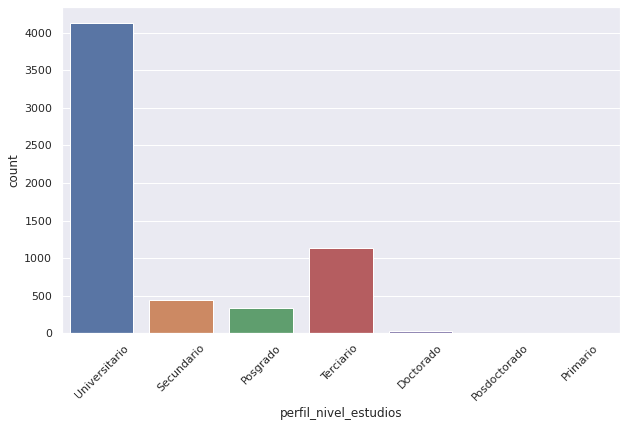

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(data=df, x='perfil_nivel_estudios')
plt.xticks(rotation=45);

¿Y si quiero ver el promedio de salarios por nivel de estudio?

Son gráficos muy versátiles, pero no siempre son adecuados. Mientras más barras se grafican, menos atención se pone en la variación entre una barra y otra, y más evidente es la distribución total. Los gráficos de barra también son muy sensibles al ordenamiento, ya que mientras más alejadas están las barras más difícil es compararlas. Por otra parte, la diferencia en el tamaño de cada barra puede codificar sólo cierta cantidad de información. Por ejemplo, si las barras son grandes en alto, una pequeña diferencia entre ellas pasará desapercibida, mientras que si las barras son pequeñas, la misma diferencia será más evidente.

Los gráficos de barra son lo más adecuados para ver las variables categóricas, por ejemplo, el nivel de estudios, y alguna función de agregación sobre las categorías como la media de la v.a. *media del salario neto*. Para eso, podemos muy fácilmente pasarle a `seaborn` una función para calcular sobre la columna de salario usando el parámetro `estimator`.

Nota: El valor del `estimator` es por defecto la media, pero ahora lo hacemos explícito. Podríamos haber seleccionado otra función, como `numpy.median`, o haber definido una nueva.

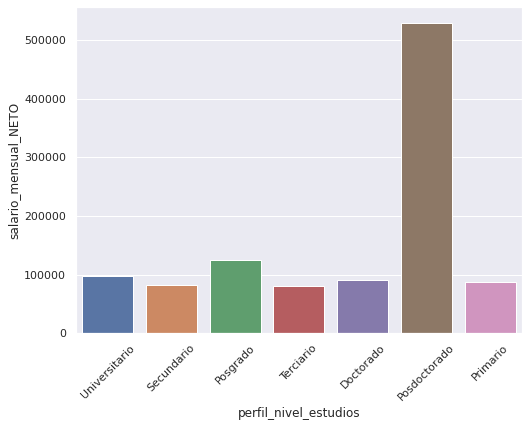

In [ ]:
# Salarios promedios por nivel de estudio
fig = plt.figure(figsize=(8,6))
sns.barplot(data=df,
                y="salario_mensual_NETO", x='perfil_nivel_estudios',
                estimator=np.mean, ci=None)
plt.xticks(rotation=45);

En este gráfico estamos usando la altura de las barras para representar el promedio de las estimaciones de salario para cada uno de los grupos. Sin embargo, esto no es evidente a primera vista. El usuario no tiene suficiente información para inferir el significado del eje vertical. Hay que tener en cuenta que muchas veces, el nombre original de la columna no representa la información agregada.

Este estadísico suele ser difícil de interpretar para quienes no son expertos en estadística.

Por último, algunas de las categorías tienen muy pocos valores para ser útiles por lo cual suele ser conveniente reagrupar y obtener un gráfico más representativo.

### Agrupaciones

Cuando queremos comparar distintos grupos, podemos usar el parámetro `hue`. Esto equivale a sumar otra v.a. al gráfico, que debe ser categórica.

Por ejemplo la variable `'perfil_estado_estudios'`.

In [ ]:
df["perfil_estado_estudios"].unique()

array(['En curso', 'Completado', 'Incompleto'], dtype=object)

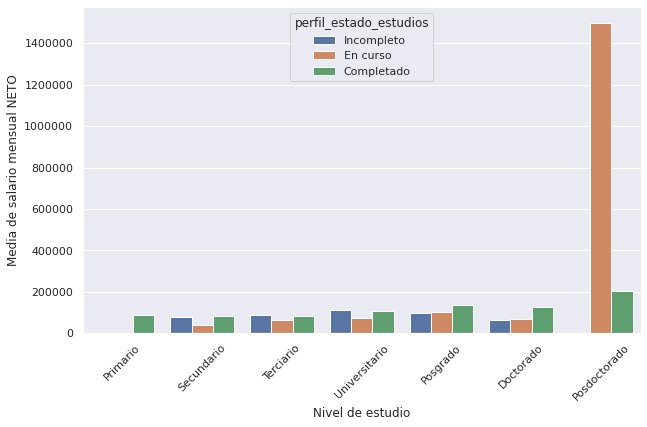

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
orden = ['Primario', 'Secundario', 'Terciario',
         'Universitario', 'Posgrado',  'Doctorado', 'Posdoctorado']
hue_orden = ['Incompleto', 'En curso', 'Completado']
sns.barplot(y=df["salario_mensual_NETO"], x=df['perfil_nivel_estudios'],
                estimator=np.mean, ci=None,
                hue=df["perfil_estado_estudios"],
                order=orden, hue_order=hue_orden
                )
plt.xticks(rotation=45)
plt.ylabel("Media de salario mensual NETO")
plt.xlabel("Nivel de estudio")
plt.ticklabel_format(style='plain', axis='y')

## Gráficos de línea

Es útil por ejemplo si se quiere graficar el salario neto en relación a la edad.

* Eje y: variable numérica
* Eje x: variable numérica continua

Es efectivo para comparar *cantidades numéricas*. Si lo comparamos con un gráfico de barras, tienen ventajas y desventajas. En primer lugar, sugiere una relación más fuerte entre los datos del eje horizontal, que deben ser secuenciales. Además de ello, pueden representar más valores ya que el peso visual de cada punto es mucho menor que una barra.

Por otra parte, un gráfico de líneas con pocos puntos puede ser indicativo de una tendencia que no existe (o que no tenemos suficientes datos como para mostrarla).

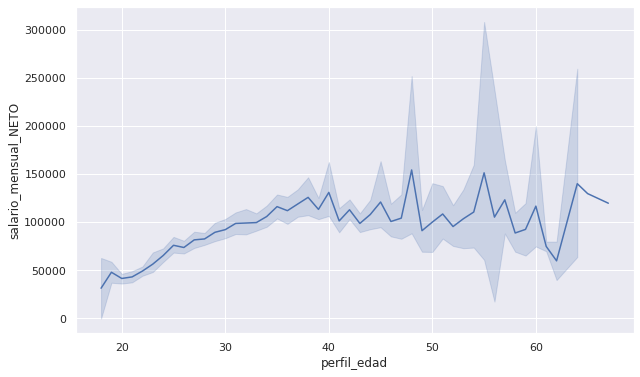

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(data=df[df['perfil_edad'] < 100],
                 x='perfil_edad', y='salario_mensual_NETO');

In [ ]:
df['perfil_edad'].describe()

count     6095.000000
mean        41.181952
std        665.721175
min         18.000000
25%         27.000000
50%         31.000000
75%         37.000000
max      52000.000000
Name: perfil_edad, dtype: float64

### Filtrando los valores de una columna del dataframe

Existen dos formas de filtrar los valores de una columna numérica del Dataframe:

```
df[df['perfil_edad'] < 100]
```
o
```
df.query('perfil_edad < 100')
```

Vayamos al código:

In [ ]:
df[df['perfil_edad'] < 100]
# Sólo se visualizan los datos donde la edad es menor a 100.
# No se ha modificado el dataset completo "df"

,perfil_genero,perfil_edad,trabajo_pais,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,perfil_carrera,perfil_universidad,perfil_cursos_especializacion,perfil_contribuciones_open_source,perfil_programa_como_hobbie,trabajo_rol,herramientas_plataforma,herramientas_languagjs_programacion,herramientas_frameworks,herramientas_data_bases,herramientas_qa_testing,herramientas_IDEs,herramientas_sistema_operativo_pc,herramientas_sistema_operativo_cel,trabajo_guardias,salario_guardias_pago,trabajo_guardias_tipo_pago,trabajo_tipo_contrato,salario_mensual_BRUTO,salario_mensual_NETO,salario_salario_dolares,salario_conformidad_sueldo,salario_comparacion_sueldo_semestre_anterior,salario_bonos,salario_bono_atado_a,salario_ajustes_inflacion_2020,salario_porcentaje_inflacion_ajuste_2020,salario_mes_ultimo_ajuste_inflacion,trabajo_violencia_laboral,perfil_orientacion_sexual,perfil_discapacidad,perfil_dificultad_ser_contratada_discapacidad,compania_cantidad_empleadxs,compania_actividad_princiapl,compania_recomendacion_lugar_trabajo,compania_politicas_inclusion,compania_beneficios_extra,compania_mejor_compania_ciudad
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.000,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.000,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.000,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,Licenciatura en Sistemas,UNNE Universidad Nacional del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,SysAdmin / DevOps / SRE,"Docker, Linux, OpenStack, VMWare, Windows Server","Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","jQuery, WordPress","Microsoft SQL Server, MySQL",PHPUnit,"Eclipse, Visual Studio Code",GNU/Linux,Android,"Sí, pasiva",0.0,Bruto,Full-Time,130000.0,102000.000,NaN,3,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,No,No,Sí,Developer,Amazon Web Services,"CSS, HTML, Javascript, SQL, TypeScript","Angular, Node.js","Amazon DynamoDB, MongoDB, MySQL",Jest,Vim,macOS,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,140000.0,106000.000,NaN,1,1,Menos de un sueldo,Performance individual,No,0.0,0,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Softwar

In [ ]:
df.query('perfil_edad < 100')

,perfil_genero,perfil_edad,trabajo_pais,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,perfil_carrera,perfil_universidad,perfil_cursos_especializacion,perfil_contribuciones_open_source,perfil_programa_como_hobbie,trabajo_rol,herramientas_plataforma,herramientas_languagjs_programacion,herramientas_frameworks,herramientas_data_bases,herramientas_qa_testing,herramientas_IDEs,herramientas_sistema_operativo_pc,herramientas_sistema_operativo_cel,trabajo_guardias,salario_guardias_pago,trabajo_guardias_tipo_pago,trabajo_tipo_contrato,salario_mensual_BRUTO,salario_mensual_NETO,salario_salario_dolares,salario_conformidad_sueldo,salario_comparacion_sueldo_semestre_anterior,salario_bonos,salario_bono_atado_a,salario_ajustes_inflacion_2020,salario_porcentaje_inflacion_ajuste_2020,salario_mes_ultimo_ajuste_inflacion,trabajo_violencia_laboral,perfil_orientacion_sexual,perfil_discapacidad,perfil_dificultad_ser_contratada_discapacidad,compania_cantidad_empleadxs,compania_actividad_princiapl,compania_recomendacion_lugar_trabajo,compania_politicas_inclusion,compania_beneficios_extra,compania_mejor_compania_ciudad
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.000,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.000,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.000,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,Licenciatura en Sistemas,UNNE Universidad Nacional del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,SysAdmin / DevOps / SRE,"Docker, Linux, OpenStack, VMWare, Windows Server","Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","jQuery, WordPress","Microsoft SQL Server, MySQL",PHPUnit,"Eclipse, Visual Studio Code",GNU/Linux,Android,"Sí, pasiva",0.0,Bruto,Full-Time,130000.0,102000.000,NaN,3,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,No,No,Sí,Developer,Amazon Web Services,"CSS, HTML, Javascript, SQL, TypeScript","Angular, Node.js","Amazon DynamoDB, MongoDB, MySQL",Jest,Vim,macOS,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,140000.0,106000.000,NaN,1,1,Menos de un sueldo,Performance individual,No,0.0,0,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Softwar

## Gráficos de frecuencias (histogramas)

Es útil en casos donde queremos ver cómo se distribuyen nuestros datos en una variable numérica continua, cuántas ocurrencias hay por rango de valores (ya que al ser continua, si no se toman rangos, graficar una barra por cada valor sería ilegible y/ costoso computacionalmente).

* Eje x: variable numérica continua
* Eje y: conteo de ocurrencias de valores en cada intervalo

El gráfico generado es un histograma de frecuencias. En el eje x se grafican los valores que toma la columna, divididos en intervalos o bins. En el eje y se grafica el conteo de ocurrencias de valores en cada intervalo.

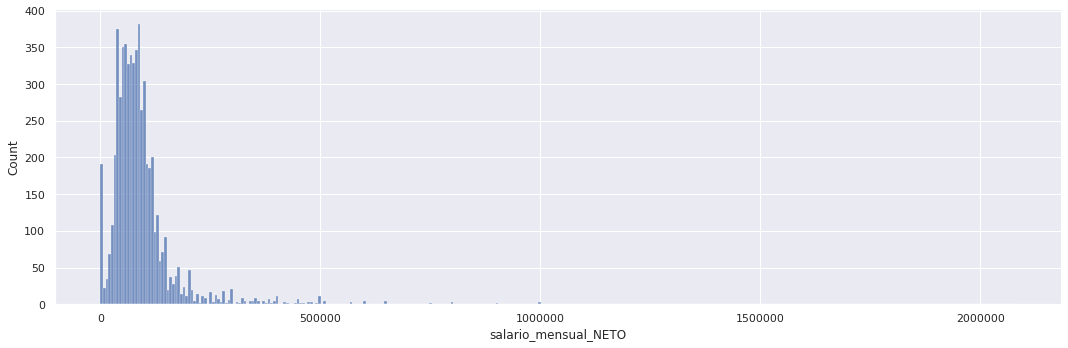

In [ ]:
sns.displot(df["salario_mensual_NETO"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

**¿Qué está pasando con ésta visualización?**

**¡Tip! **Antes de graficar, controlar el rango (ya que seaborn intentará crear miles de segmentos si el rango es muy grande) y remover los valores nulos.

In [ ]:
print("Rango: ", df["salario_mensual_NETO"].min(), df["salario_mensual_NETO"].max())

Rango:  1.0 2080000.0


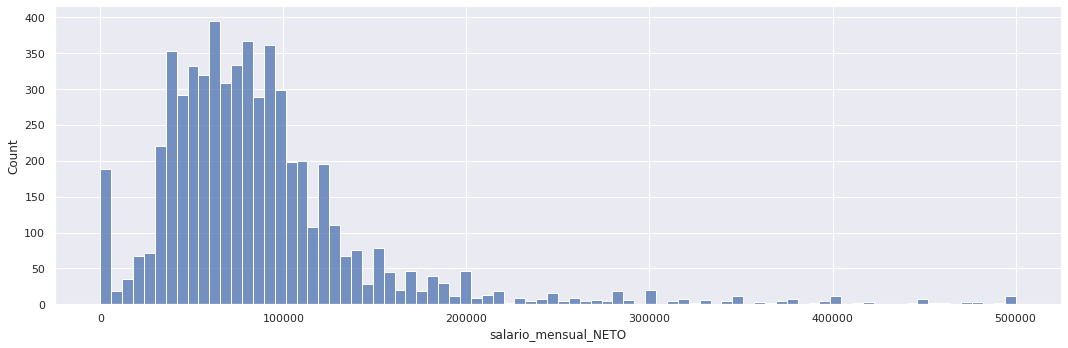

In [ ]:
# Volvemos a graficar limitando los valores de la columna 'salary_monthly_NETO'
sns.displot(df[df["salario_mensual_NETO"]<=500000]["salario_mensual_NETO"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

Podemos ver que los "valores atípicos" u "outliers", tiene impacto también en las visualizaciones y por ello es necesario analizar éstos casos extremos y darle un tratamiento adecuado al problema en análisis. Veremos en mayor profundidad ésto más adelante.

## Mapa de calor (Heatmap)

Podemos crear un gráfico que nos compare las frecuencias de dos variables categóricas, por ejemplo, “perfil_genero” y "perfil_nivel_estudios", donde el color de cada "cuadrante" será más oscuro donde hay mayor frecuencia de casos.

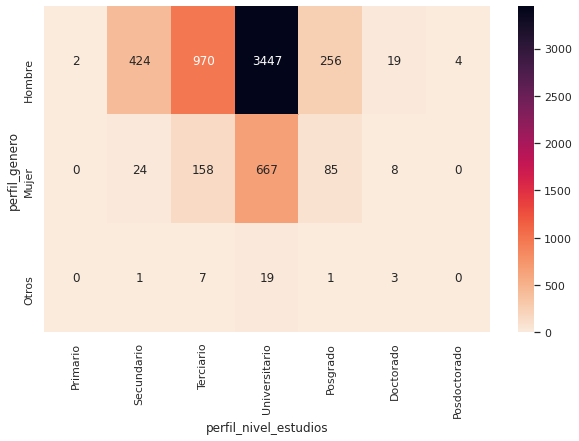

In [ ]:
orden = ['Primario', 'Secundario', 'Terciario',
         'Universitario', 'Posgrado',  'Doctorado', 'Posdoctorado']
exp = pd.crosstab(df["perfil_genero"],
                  df["perfil_nivel_estudios"])[orden]
sns.heatmap(exp, annot=True, fmt="d", cmap="rocket_r");

In [ ]:
# Se ha graficado la siguiente información conocida como "Tabla cruzada"
pd.crosstab(df["perfil_genero"],
                  df["perfil_nivel_estudios"])[orden]

perfil_nivel_estudios,Primario,Secundario,Terciario,Universitario,Posgrado,Doctorado,Posdoctorado
perfil_genero,,,,,,,
Hombre,2,424,970,3447,256,19,4
Mujer,0,24,158,667,85,8,0
Otros,0,1,7,19,1,3,0


## Ejercicio 1 - Histograma


a) Realizar un histograma que muestre la cantidad de personas de acuerdo a la variable `perfil_edad`.

**¡Tip!** Antes de graficar, controlar el rango (ya que seaborn intentará crear miles de segmentos si el rango es muy grande). Usar las funciones `.min()` y `.max()`. De ser necesario filtrar el conjunto de datos para graficar sólo valores menores a cierta edad.

b) ¿La variable edad tiene valores extremos?

In [ ]:
# Responder acá. Cálculo del rango.
print("Rango: ", df["perfil_edad"].min(), df["perfil_edad"].max())
# Vemos que la variable edad tiene valores extremos, como el '52000'

Rango:  18 52000


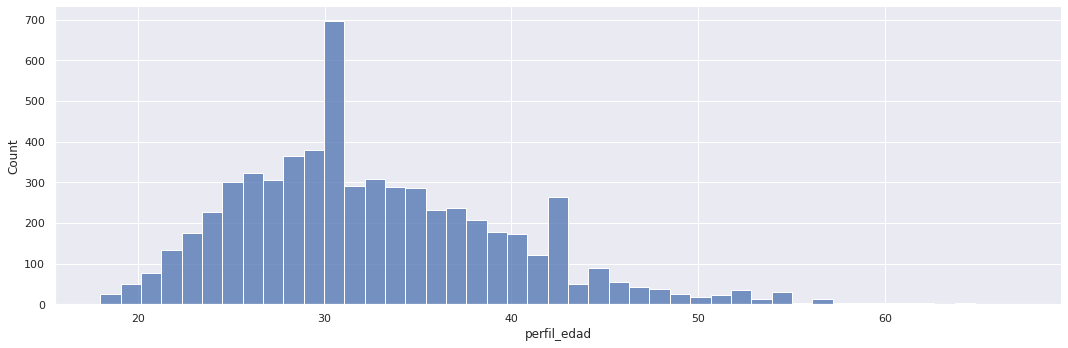

In [ ]:
# Responder acá. Gráfico del histograma de frecuencias.
sns.displot(df[df["perfil_edad"]<100]["perfil_edad"] , aspect=3)
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

# Conclusiones preliminares del análisis de salarios

Las visualizaciones simples son prácticas para conocer la forma de los datos rápidamente, porque condensan mucha información.
En base a las primeras visualizaciones de los datos se pueden realizar varias preguntas o hipótesis:

1. ¿Cuál es la edad de la mayoría de los encuestados?
La mayoría de los encuestados tiene entre X e Y años. (Reemplazar X e Y por los valores que se aprecian en el ejercicio 1).

2. ¿Cuánto cobran de salario Neto la mayoría de los programadores en Argentina?
- El rango de valores de salario neto va desde 0 hasta aproximadamente 2M.
- La mayoría de los valores se concentra por debajo de los 250K, y pocos superan los 500K.
- Los valores más frencuentes aparentan estar cerca de los 100K.
- Hay un pico de ocurrencias cercano al valor 0, que brinda poco detalle.
- Se verifica un salario promedio mayor entre quienes han realizado un Posdoctorado, pero al ser sólo 4 registros, ésta subpoblación no es representativa en el total de la muestra (6095 personas respondieron la encuesta).
- Los salarios más altos son en su mayoría aquellos que están dolarizados (ver apartado "Bonus Track").

3. ¿Existe una diferencia de salarios entre los hombres y otros géneros?
- Existe una mayor cantidad de respuestas de la subpoblación "Hombres Universitarios".


Este es un punto de partida para el análisis del conjunto de datos. El análisis exploratorio de datos es un proceso que generalmente requiere varias iteraciones de análisis: a medida que se obtengan conclusiones, se descrubrirán otros aspectos relevantes de los datos, lo cual disparará nuevas preguntas.

# Manejo de valores atípicos (Outliers)



<center>
<img src="https://miro.medium.com/max/695/1*N_C1Mhiz8hzZkKrUfjez3A.jpeg" height="300" />
</center>

¿Notan algo diferente en la imagen anterior?


Todos los números están en el rango de los 30, excepto el número 3. Ese es nuestro valor atípico, porque no está cerca de los demás números.

**¿De dónde provienen?**

El proceso de Ciencia de Datos comienza con la recolección de datos y es entonces cuando los valores atípicos se introducen en la muestra. Sin embargo, en general no conocemos los valores atípicos en absoluto en la fase de recopilación. Los valores atípicos pueden ser el resultado de un error durante la recolección de datos o pueden ser simplemente una indicación de la varianza en los datos.

**¿Cuál es el impacto de un valor atípico?**

1. Causa graves problemas en el análisis estadístico, por ejemplo tiene un impacto significativo en la media.
2. Sesga los datos.
3. Impacto significativo en la desviación estándar.


## Percentiles y gráficos de caja o 'boxplot'

Ahora que sabemos que los valores atípicos pueden ser un error o simplemente una varianza, ¿cómo decidir si son importantes o no? Bueno, es bastante sencillo si son el resultado de un error, entonces podemos ignorarlos o eliminarlos, pero si es sólo una varianza en los datos tendríamos que pensar un poco más. Antes de intentar comprender si hay que ignorar los valores atípicos o no, tenemos que conocer las formas de identificarlos.

En estadística descriptiva, un gráfico de caja es un método para representar gráficamente grupos de datos numéricos a través de sus cuartiles. Los gráficos de caja también pueden tener líneas que se extienden verticalmente desde las cajas (bigotes) indicando la variabilidad fuera de los cuartiles superior e inferior. Los valores atípicos pueden representarse como puntos individuales.

La definición anterior sugiere que, si hay un valor atípico, se representará como un punto en el diagrama de caja, mientras que el resto de los datos de la muestra se agrupará y se mostrará en forma de cajas. Intentemos verlo nosotros mismos.

<center>
<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" height="300" />
</center>

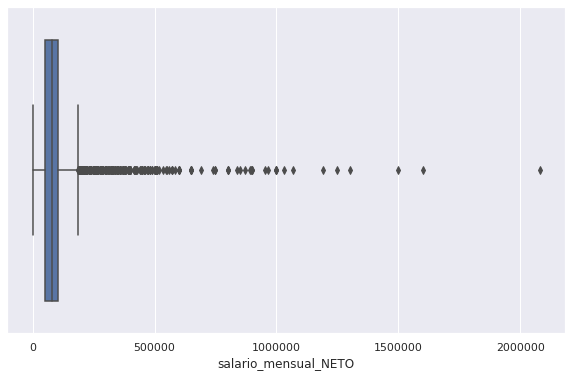

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x=df["salario_mensual_NETO"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

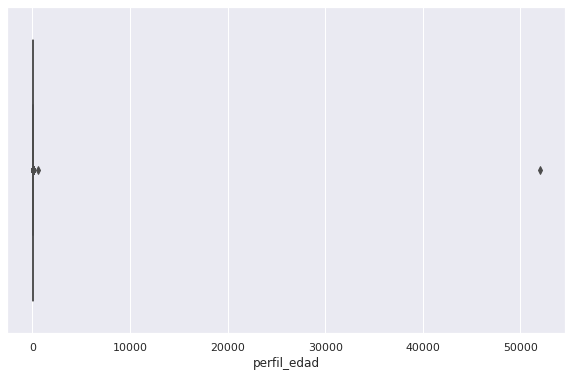

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x=df["perfil_edad"])

Además de permitirnos visualizar valores atípicos, otro ejemplo de uso de los boxplots es el poder comparar la distribución de una variable numérica con respecto a otra categórica.

Comparemos los salarios netos con respecto al nivel de estudios alcanzado.

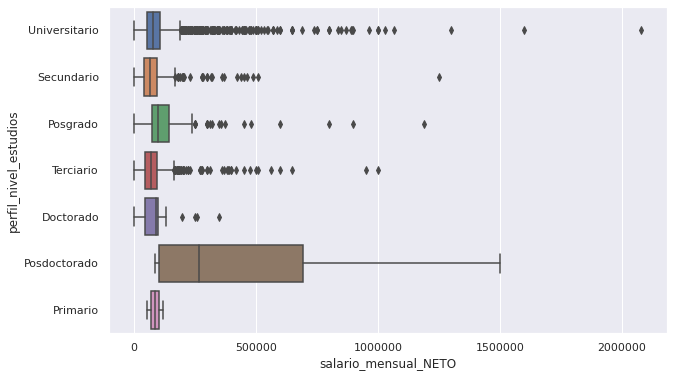

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(data=df, x="salario_mensual_NETO", y='perfil_nivel_estudios')
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

**Si un valor atípico debe ser eliminado o no, debe ser analizado por el analista o científico de datos de acuerdo al problema en el que está trabajando.**

Por ejemplo, en nuestro dataset de respuestas a encuesta de salarios IT podemos tomar algunas decisiones de curación como:
- Respuestas con edades menores de 18 y mayores a 99 pueden ser eliminados.
- Eliminar salarios mayores a un millón de pesos (pero conservamos salarios altos como 500mil por ejemplo).


En otro dataset, de datos de propiedades en venta, que se usará para predecir el precio de venta:
- Cantidad de baños cero: Parece un valor atípico, que se ingresó de forma errónea, ya que toda propiedad debe tener al menos un baño, en éste caso se puede reemplazar por uno, ya que todas las casas deberían tener al menos un baño. Observar que pueden existir valores atípicos en los extremos inferiores también.
- Eliminar columna de dirección, ya que por sí sola no aporta nada y tendría gran variavilidad de valores posibles, es mejor contar con el Código Postal o Latitud/Longitud.
- Cantidad de habitaciones, eliminar casos por encima de 20.


###**Diferentes métodos de eliminación de outliers**

####**Filtrado en un valor específico**

Me quedo por ejemplo con edades mayores a 18 y menores a 99.


####**Rango intercuartílico**

Punto de datos que queda fuera de 1,5 veces de un rango intercuartil.
Ver diagrama de caja.


####**Desviación estándar**

Punto de datos que cae fuera de 2,5 desviaciones estándar con respecto a la media, la desviación estándar nos dice "cuánto nos alejamos de la media".

<center>
<img src="https://help.highbond.com/helpdocs/analytics/141/user-guide/es/Content/images/an/outliers_2.png" height="300" />
</center>

No todos los métodos son útiles en todos los casos, depende la variable que estoy analizando y se pueden probar varios métodos para ver cuál se ajusta mejor a nuestro dominio de problema.


### Funciones Auxiliares
¡Se debe correr al principio! Antes de la sección de Outliers.

No es necesaria su comprensión linea a linea, porque puede haber muchas formas de escribirlas e incluso librerías que nos brinden otra función, pero sí comprender el impacto en nuestros datos.

In [ ]:
# Eliminación de valores atípicos por medio del Rango Intercuartílico
def clean_outliers_q3(dataset, column_name, iqr_factor = 1.5):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (iqr_factor * interesting_col.quantile(.75)))
    return dataset[mask_outlier]

# Eliminación de valores atípicos por medio de la Desviación estándard
def clean_outliers_sd(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <=
        (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

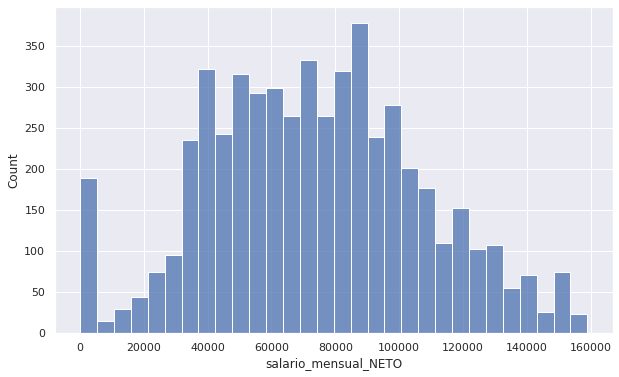

In [ ]:
data = clean_outliers_q3(df, 'salario_mensual_NETO', 1.5)['salario_mensual_NETO']
sns.histplot(x=data)

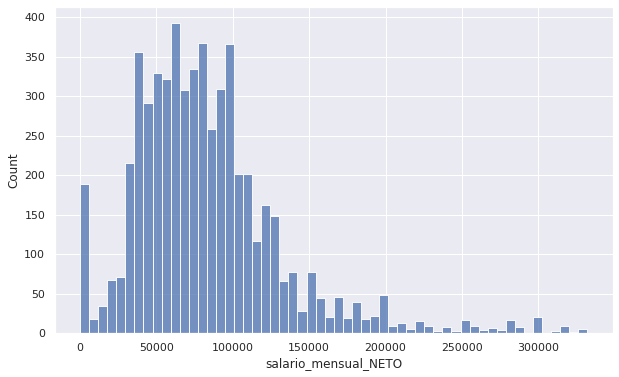

In [ ]:
data2 = clean_outliers_sd(df, 'salario_mensual_NETO')['salario_mensual_NETO']
sns.histplot(x=data2)

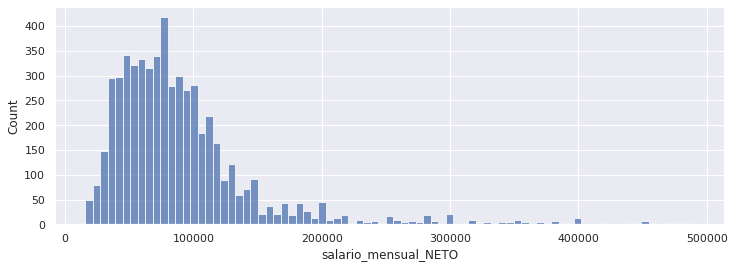

In [ ]:
# Filtrado por un valor constante
df_filtrado = df[(df["salario_mensual_NETO"]<500000) & (df["salario_mensual_NETO"]>15000)] # Podría pensarse en un límite inferior como el salario mínimo
fig = plt.figure(figsize=(12, 4))
sns.histplot(x=df_filtrado['salario_mensual_NETO'])

## Manejo de valores faltantes

Los valores faltantes son un problema bastante común al cual nos enfrentamos a la hora de hacer ciencia de datos.

Son un problema principalmente para el modelado de *machine learning* (que verán más adelante), pero también pueden serlo a la hora de graficar o buscar valores estadísticos.

Normalmente los verán nombrados como: valores faltantes, nulos, missing values, NaN, NA o null.

Primero visualizamos la cantidad de respuestas con datos faltantes por cada variable, haciendo uso de la función `.isnull()`:

In [ ]:
df.isnull().sum()

perfil_genero                                       0
perfil_edad                                         0
trabajo_pais                                        0
trabajo_provincia                                   0
perfil_anos_experiencia                             0
trabajo_anios_empresa_actual                        0
trabajo_anios_puesto_actual                         0
trabajo_personas_a_cargo                            0
perfil_nivel_estudios                               0
perfil_estado_estudios                              0
perfil_carrera                                    299
perfil_universidad                                534
perfil_cursos_especializacion                       0
perfil_contribuciones_open_source                   0
perfil_programa_como_hobbie                         0
trabajo_rol                                         0
herramientas_plataforma                             2
herramientas_languagjs_programacion                 1
herramientas_frameworks     

In [ ]:
# Total de valores nulos
df.isnull().sum().sum()

20588

In [ ]:
df.shape # de 6095*49=298655 valores en total, un 6,89%.

(6095, 48)

Y después podemos hacer lo mismo pero con el porcentaje del total de respuestas:

In [ ]:
df.isnull().sum()/len(df)*100

perfil_genero                                     0.000000
perfil_edad                                       0.000000
trabajo_pais                                      0.000000
trabajo_provincia                                 0.000000
perfil_anos_experiencia                           0.000000
trabajo_anios_empresa_actual                      0.000000
trabajo_anios_puesto_actual                       0.000000
trabajo_personas_a_cargo                          0.000000
perfil_nivel_estudios                             0.000000
perfil_estado_estudios                            0.000000
perfil_carrera                                    4.905660
perfil_universidad                                8.761280
perfil_cursos_especializacion                     0.000000
perfil_contribuciones_open_source                 0.000000
perfil_programa_como_hobbie                       0.000000
trabajo_rol                                       0.000000
herramientas_plataforma                           0.0328

### **¿Qué se puede hacer con estos valores faltantes?**

Bueno, hay varias opciones... Como todo, dependerá de la situación.

#### **Eliminar los datos con valores faltantes**

La primera y más simple sería realizar lo que se conoce como drop, que consta simplemente de deshacerse de todas las filas (o más raramente columnas) que contengan valores faltantes.

In [ ]:
df2 = df.copy() # hacemos una copia del df para mostrar esto sin modificar nuestro dataset original

In [ ]:
df2.isnull().sum() # verificamos que la suma de nulos sea igual que en df

perfil_genero                                       0
perfil_edad                                         0
trabajo_pais                                        0
trabajo_provincia                                   0
perfil_anos_experiencia                             0
trabajo_anios_empresa_actual                        0
trabajo_anios_puesto_actual                         0
trabajo_personas_a_cargo                            0
perfil_nivel_estudios                               0
perfil_estado_estudios                              0
perfil_carrera                                    299
perfil_universidad                                534
perfil_cursos_especializacion                       0
perfil_contribuciones_open_source                   0
perfil_programa_como_hobbie                         0
trabajo_rol                                         0
herramientas_plataforma                             2
herramientas_languagjs_programacion                 1
herramientas_frameworks     

Ahora que ya tenemos la copia de nuestro df, ya podemos *dropear*:

In [ ]:
df2.dropna(inplace = True)
# Con "inplace = True", le indicamos que se borran los registros del df2, es decir, lo modificamos y ya no tendrá valores faltantes.

Y corroboramos:

In [ ]:
df2.isna().sum()

perfil_genero                                    0
perfil_edad                                      0
trabajo_pais                                     0
trabajo_provincia                                0
perfil_anos_experiencia                          0
trabajo_anios_empresa_actual                     0
trabajo_anios_puesto_actual                      0
trabajo_personas_a_cargo                         0
perfil_nivel_estudios                            0
perfil_estado_estudios                           0
perfil_carrera                                   0
perfil_universidad                               0
perfil_cursos_especializacion                    0
perfil_contribuciones_open_source                0
perfil_programa_como_hobbie                      0
trabajo_rol                                      0
herramientas_plataforma                          0
herramientas_languagjs_programacion              0
herramientas_frameworks                          0
herramientas_data_bases        

¡Genial! No tenemos más valores faltantes.

Sin embargo, como ya se remarcó, esta no siempre es la mejor opción.

Entonces, ¿qué otra cosa podríamos hacer?

### **Imputar por la media o mediana**

Otra opción es imputar ese valor por algún valor estadístico, como la media o la mediana...
Las ventajas son que es fácil, rápido y refleja mejor la distribución de la variable.
Pero también tiene desventajas: no tiene en cuenta las correlaciones entre características, es decir, solo funciona a nivel de columna. Tampoco es muy preciso, es sensible a valores extremos* y su uso no es útil en variables categóricas.

*es conveniente primero hacer la limpieza de valores extremos y posteriormente realizar esta imputación.

In [ ]:
df3 = df.copy() # nuevamente hacemos una copia para no modificar al original

In [ ]:
df3.fillna(df3.mean(), inplace = True)

In [ ]:
df3.isna().sum()

perfil_genero                                       0
perfil_edad                                         0
trabajo_pais                                        0
trabajo_provincia                                   0
perfil_anos_experiencia                             0
trabajo_anios_empresa_actual                        0
trabajo_anios_puesto_actual                         0
trabajo_personas_a_cargo                            0
perfil_nivel_estudios                               0
perfil_estado_estudios                              0
perfil_carrera                                    299
perfil_universidad                                534
perfil_cursos_especializacion                       0
perfil_contribuciones_open_source                   0
perfil_programa_como_hobbie                         0
trabajo_rol                                         0
herramientas_plataforma                             2
herramientas_languagjs_programacion                 1
herramientas_frameworks     

¿Se les ocurre por qué algunas variables siguen teniendo valores faltantes?

¡Exacto! Son variables categóricas, así que no tienen media. En este caso, podríamos imputar por la moda (valor más frecuente).

### **Imputar por la moda**

In [ ]:
df3.fillna(df.mode().iloc[0], inplace = True) # .iloc[0] hace que la moda se calcule independientemente para cada columna.

In [ ]:
df3.isna().sum()

perfil_genero                                    0
perfil_edad                                      0
trabajo_pais                                     0
trabajo_provincia                                0
perfil_anos_experiencia                          0
trabajo_anios_empresa_actual                     0
trabajo_anios_puesto_actual                      0
trabajo_personas_a_cargo                         0
perfil_nivel_estudios                            0
perfil_estado_estudios                           0
perfil_carrera                                   0
perfil_universidad                               0
perfil_cursos_especializacion                    0
perfil_contribuciones_open_source                0
perfil_programa_como_hobbie                      0
trabajo_rol                                      0
herramientas_plataforma                          0
herramientas_languagjs_programacion              0
herramientas_frameworks                          0
herramientas_data_bases        

Otras opciones:

- **Imputar por un valor fijo**. Se debe ser cuidadoso porque los valores imputados modificarán la distrribución y estadísticas de nuestros datos. Por ejemplo reemplazar en un dataset de propiedades en venta, el valor faltante de baños por 1, ya que todas las propiedades debieran tener al menos 1 baño.
- **Imputar por un valor al azar que esté en esa misma columna** (no muy utilizado). Es decir, para los valores faltantes en la edad, tomará algún valor al azar presente en la variable edad y lo colocará en lugar de ese valor faltante.
- **Imputar utilizando métodos de predicción**: éstos métodos nos permiten utilizar para predecir los datos faltantes de una columna, no sólo los datos que si tenemos de esa variable, si no, utilizar datos de otras variables numéricas. Algunos de éstos métodos son "K vecinos más próximos (KNN)", "Árboles de Decisión". Aunque no vamos a verlos en éste encuentro, sepan que se puede ¡y vale la pena investigarlo una vez que terminen este bootcamp!

## Ejercicio 2 - Curación de datos

Analizar la variable `'salario_mensual_NETO'` para detectar valores extremos
Hints:
- Analizar sus valores, con las funciones .describe().round(3) o su rango con .min() y .max()
- Realizar un diagrama de caja (función sns.boxplot) que visualize los cuartiles de la variable y los posibles valores atípicos.
- Decidir el rango de valores que queremos conservar (o eliminar) y crear un nuevo dataframe que tenga todos los mismos datos que el dataframe original (df), pero con los valores de salarios netos que no queremos, ya filtrados o eliminados.

In [ ]:
# Responder acá, rangos de valores de la variable
df["salario_mensual_NETO"].describe().round(3)

count       5883.000
mean       94907.949
std        96862.258
min            1.000
25%        51480.000
50%        78000.000
75%       106000.000
max      2080000.000
Name: salario_mensual_NETO, dtype: float64

In [ ]:
# Responder acá, rangos de valores de la variable
print("Rango: ", df["salario_mensual_NETO"].min(), df["salario_mensual_NETO"].max())

Rango:  1.0 2080000.0


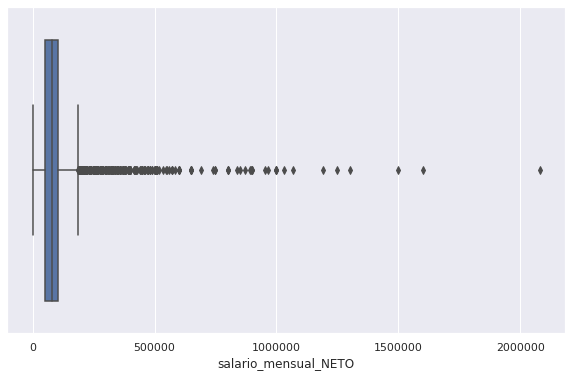

In [ ]:
# Boxplot
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x=df["salario_mensual_NETO"])
plt.ticklabel_format(style='plain', axis='x') # Para evitar la notación científica en las etiquetas

In [ ]:
# Filtro los salarios
df_filtrado2 = df[(df["salario_mensual_NETO"] < 500000) & (df["salario_mensual_NETO"] > 17000)] # 6095-5583 = 512 filas eliminadas (8.4%).

## Bonus track: gráficos de puntos (scatterplots)

* Eje y: variable numérica continua
* Eje x: variable numérica continua

Muestra la relación entre 2 o 3 variables numéricas continuas. Adicionalmente, se puede usar el color y la forma de los puntos para variables categóricas, y el tamaño para una variable numérica extra.

En el siguiente gráfico se ve como, a pesar de que la edad es una variable continua, el scatter plot no es una visualización que permite encontrar patrones en los datos ya que los puntos se superponen demasiado.

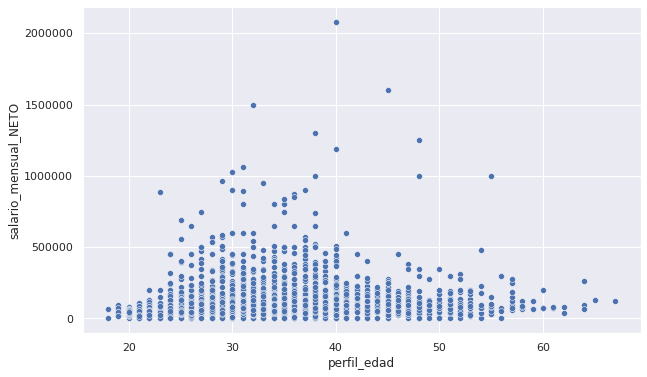

In [ ]:
plt.figure(figsize=(10,6))
edad_max = 100
sns.scatterplot(data=df[df["perfil_edad"] < edad_max],
                    x='perfil_edad', y='salario_mensual_NETO')
plt.ticklabel_format(style='plain', axis='y') # Para evitar la notación científica en las etiquetas

En este conjunto de datos en particular, el scatterplot no nos ayuda a esclarecer las distribuciones de las variables. Esto sucede por dos motivos:
* Los valores se acumulan en algunos rangos y son muy esparsos en otros.
* Hay demasiados datos como para que cada punto aporte información relevante.

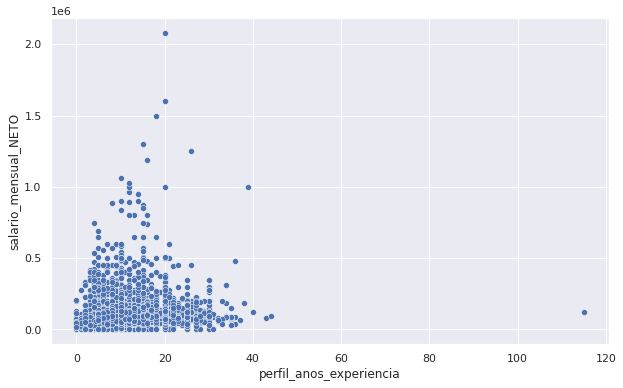

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, #df[(df["salario_mensual_NETO"] < 500000) & (df["perfil_anos_experiencia"] < 50)],
                    x='perfil_anos_experiencia', y='salario_mensual_NETO'
                    # marker=".",
                    # s=10,  # marker size
                )

Sin embargo, el poder de los scatterplots radica en que el elemento gráfico usado (el punto) tiene un peso visual muy bajo, y por lo tanto podemos codificar múltiples variables en una misma visualización.

False    5419
True      676
Name: salario_en_usd_bool, dtype: int64


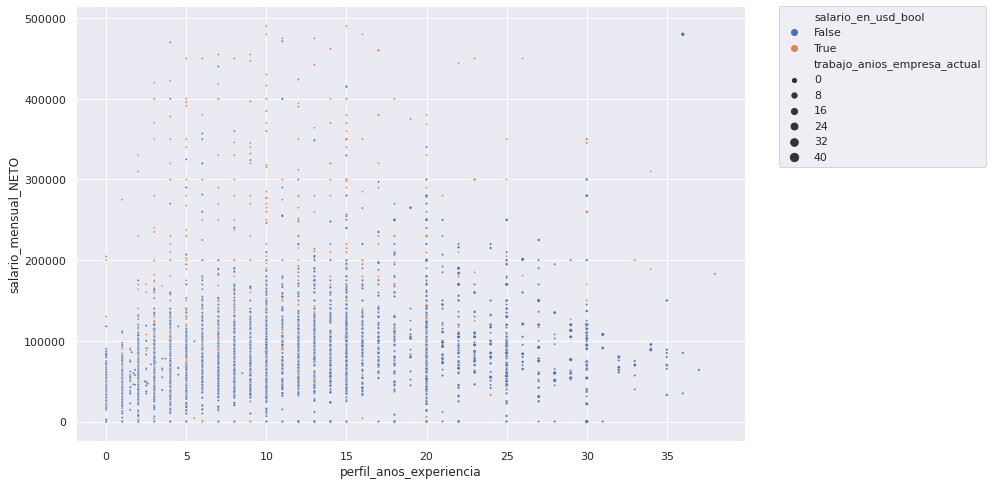

In [ ]:
df['salario_en_usd_bool'] = ~df['salario_salario_dolares'].isna()
print(df['salario_en_usd_bool'].value_counts())

plt.figure(figsize=(12,8))
mask = (df['perfil_anos_experiencia'] < 40) & (df['salario_mensual_NETO'] < 500000)
sns.scatterplot(data=df[mask], #.sample(500),
                    x='perfil_anos_experiencia', y='salario_mensual_NETO',
                    marker='.',
                    hue='salario_en_usd_bool',
                    size='trabajo_anios_empresa_actual')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)